# **Personal Health, Nutrition and Powerlifting Data Analysis**

This project will analyse my own personal data of various health statistics along with powerlifting training data. As an individual who competes in the under 93kg weight class category of powerlifting, various data is tracked and analysed by my coach. We will look at my data between March 2023 to August 2023 and investigate if there are any relationships between nutrition, health and powerlifting training results. 

## Table of Contents

[1. Introduction](#1.-Introduction) <br>
[2. Data Sources](#2.-Data-Sources) <br>
[3. Data Inspection and Cleansing](#3.-Data-Inspection-and-Cleansing) <br>
[4. Data Preparation for Analysis](#4.-Data-Preparation-for-Analysis) <br>
[5. Data Analysis](#5.-Data-Analysis) <br>
[6. Conclusion and Discussion](#6.-Conclusion-and-Discussion) <br>
[7. Future Analysis](#7.-Future-Analysis) <br>
[8. References](#8.-References)

## 1. Introduction

Powerlifting is a type of power sport that focuses on absolute strength. The athlete’s main goal is to lift as much weight as they can in the three compound lifts: the squat, the bench press, and the deadlift (Wood, 2014). Strength and technique are the most important characteristic for powerlifting which is the ability to produce maximal force. To increase maximal strength, everyone must undertake strength training (such as periodised programs) that can elicit a strength adaptation response (Latella C, 2020). 

Apart from the direct training, it is believed other factors such as nutrition, sleep and stress can greatly influence the ability to build muscle and affect sports performance (Dumitru, 2020). In this project, I will use my own personal data to inspect any relationship between various data points with the ultimate goal of staying within my powerlifting weight class of 93kgs by losing weight and finding factors that could assist in increasing my strength for improved powerlifting performance.

**The following questions will be explored:** <br>
*Q1. On what days are most calories consumed on average? <br>
Q2. From nutrition data, what affects the body weight the most? <br>
Q3. What nutrition factors influence morning bodyweight? <br>
Q4. How are calories correlated to macro nutrients (protein, carbs, and fats)? <br>
Q5. How does sleep affect resting heart rate? <br>
Q6. What are the ranges of kilograms lifted in the gym on a week-to-week basis for compound movements (‘Low Bar Squat’, ‘Comp Bench’, ‘Conventional Deadlift’)? <br>
Q7. Within compound movements how does my max lifts compare to the public (comparing against StrengthLevel.com data)? <br>
Q8. Within the available data, what factors contribute to getting stronger (increasing my 'Max' load) in the 'Low Bar Squat'?*



## 2. Data Sources

This project uses variety of data inputted and generated by me:<br>
**Nutrition_Data.csv** – Spreadsheet provided by my coach over google sheets. *Macro nutrient* data is obtained by MyFitnessPal application, where consumed food is entered daily. *Morning Bodyweight* data is entered manually each morning. Finally, *Steps* and *Hours Slept* are obtained from Fitbit Versa and updated into the sheet. Columns are:
* Date
* Week_Num
* Day
* Calories
* Proteins
* Fats
* Carbs
* Morning Bodyweight
* Steps
* Hours Slept
* Weight Class


**resting_heart_rate-2023-02-09.json** – *Resting heart rate* data is measured from Fitbit Versa and was obtained through the Fitbit website (https://www.fitbit.com). Columns are:
* dateTime
* value


**Powerlifting_log.csv** – Spreadsheet of training program provided by my coach over google sheets. *Sets*, *Reps* and *Intensity* is prescribed by my coach while *Load* and *IsRPE* (‘Is Rate of Perceived Effort’ – indicating the difficulty of the lift) is determined by me during the training and entered in. Columns are: 
* Day ID
* Block
* Week
* Day
* Date
* Exercise
* Sets
* Reps
* Intensity
* Load
* lsRPE


**StrengthLevel.com.csv** – My best lift load and reps were entered into the StrengthLevel calculator (https://strengthlevel.com) to obtain *Stronger Than (Population)* percentile. This was entered into an excel sheet and saved as a csv file. Columns are:
* Exercise
* Reps
* Lift (kg)
* Stronger Than (Population)


## 3. Data Inspection and Cleansing

The data used in this analysis covers around 4 months (late March 2023 to August 2023) of data. Unfortunately, there is a period of roughly 3 weeks during mid-April 2023 to early May 2023 where some of the nutrition data was not logged due to being on holidays. No training was performed during this period leading to no powerlifting data as well. Missing data were either backfilled with available previous dates data or zeroed out. 

Most of the data were extracted from google sheets and reformatted to a single tabular format.

## 4. Data Preparation for Analysis

In [338]:
# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set() # apply default seaborn theme, scaling and colour palette

**4.1 Nutrition_Data.csv**

In [339]:
# Load data file Nutrition_Data.csv
df_nut = pd.read_csv('Nutrition_Data.csv', thousands=',')
df_nut

,Date,Week_Num,Day,Calories,Proteins,Fats,Carbs,Morning Bodyweight,Steps,Hours Slept,Weight Class
0,27/03/2023,WEEK 1,Monday,2975.0,182.0,121.0,203.0,93.5,5435.0,6.3,93
1,28/03/2023,WEEK 1,Tuesday,2790.0,153.0,133.0,306.0,93.4,6163.0,6.0,93
2,29/03/2023,WEEK 1,Wednesday,4374.0,244.0,141.0,488.0,93.2,5466.0,6.3,93
3,30/03/2023,WEEK 1,Thursday,2974.0,230.0,93.0,262.0,93.3,6414.0,5.6,93
4,31/03/2023,WEEK 1,Friday,4000.0,220.0,110.0,300.0,93.2,8511.0,6.3,93
...,...,...,...,...,...,...,...,...,...,...,...
128,2/08/2023,WEEK 17,Wednesday,2767.0,194.0,94.0,270.0,94.0,7058.0,7.0,93
129,3/08/2023,WEEK 17,Thursday,2515.0,178.0,80.0,236.0,93.9,6084.0,7.3,93
130,4/08/2023,WEEK 17,Friday,NaN,NaN,NaN,NaN,94.0,9096.0,6.8,93
131,5/08/2023,WEEK 17,Saturday,3267.0,171.0,119.0,324.0,93.9,8627.0,6.4,93


In [340]:
# Convert 'Date' to date data type
df_nut['Date'] = pd.to_datetime(df_nut['Date'], format='%d/%m/%Y')


In [341]:
# Calculate weekly averages 
weekly = df_nut.groupby(pd.Grouper(key='Date', freq='W')).mean().reset_index()
weekly = weekly.add_prefix('Wk_Avg_')
weekly = weekly.rename(columns={'Wk_Avg_Date':'Date'})

weekly

,Date,Wk_Avg_Calories,Wk_Avg_Proteins,Wk_Avg_Fats,Wk_Avg_Carbs,Wk_Avg_Morning Bodyweight,Wk_Avg_Steps,Wk_Avg_Hours Slept,Wk_Avg_Weight Class
0,2023-04-02,3410.142857,199.285714,123.285714,323.428571,93.571429,6912.857143,6.371429,93
1,2023-04-09,3141.428571,179.428571,115.714286,316.000000,93.583333,6487.428571,6.371429,93
2,2023-04-16,2772.000000,149.714286,96.857143,286.000000,94.142857,8372.571429,6.914286,93
3,2023-04-23,2181.000000,164.000000,97.000000,143.000000,94.533333,6969.500000,6.700000,93
4,2023-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
5,2023-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
6,2023-05-14,2604.000000,123.666667,84.000000,301.666667,94.880000,9006.000000,7.033333,93
7,2023-05-21,3097.285714,209.000000,98.714286,305.571429,95.014286,8148.000000,6.200000,93
8,2023-05-28,2858.200000,150.400000,93.800000,347.200000,95.314286,8569.142857,6.685714,93
9,2023-06-04,2976.500000,192.750000,94.750000,279.750000,95.957143,7763.428571,6.700000,93


**Weekly vs Daily** <br>
For most of the columns in nutrition dataframe, weekly average is preferred due to volatility of daily values. Comparing weekly averages instead of daily values allows a simpler week to week comparison. 

In [342]:
# Create new datafram with weekly data
nutrition = pd.merge(df_nut, weekly, on='Date', how='left')

# Select required columns
nutrition = nutrition[['Date','Day','Calories','Morning Bodyweight','Weight Class','Wk_Avg_Calories','Wk_Avg_Proteins',
                      'Wk_Avg_Fats','Wk_Avg_Carbs','Wk_Avg_Steps','Wk_Avg_Hours Slept']]
nutrition

,Date,Day,Calories,Morning Bodyweight,Weight Class,Wk_Avg_Calories,Wk_Avg_Proteins,Wk_Avg_Fats,Wk_Avg_Carbs,Wk_Avg_Steps,Wk_Avg_Hours Slept
0,2023-03-27,Monday,2975.0,93.5,93,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-28,Tuesday,2790.0,93.4,93,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-29,Wednesday,4374.0,93.2,93,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-30,Thursday,2974.0,93.3,93,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-31,Friday,4000.0,93.2,93,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
128,2023-08-02,Wednesday,2767.0,94.0,93,NaN,NaN,NaN,NaN,NaN,NaN
129,2023-08-03,Thursday,2515.0,93.9,93,NaN,NaN,NaN,NaN,NaN,NaN
130,2023-08-04,Friday,NaN,94.0,93,NaN,NaN,NaN,NaN,NaN,NaN
131,2023-08-05,Saturday,3267.0,93.9,93,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
# Back fill rest of the week (Monday to Saturday) with weekly averages
nutrition['Wk_Avg_Calories'] = nutrition['Wk_Avg_Calories'].replace(np.nan, method = 'bfill')
nutrition['Wk_Avg_Proteins'] = nutrition['Wk_Avg_Proteins'].replace(np.nan, method = 'bfill')
nutrition['Wk_Avg_Fats'] = nutrition['Wk_Avg_Fats'].replace(np.nan, method = 'bfill')
nutrition['Wk_Avg_Carbs'] = nutrition['Wk_Avg_Carbs'].replace(np.nan, method = 'bfill')
nutrition['Wk_Avg_Steps'] = nutrition['Wk_Avg_Steps'].replace(np.nan, method = 'bfill')
nutrition['Wk_Avg_Hours Slept'] = nutrition['Wk_Avg_Hours Slept'].replace(np.nan, method = 'bfill')
nutrition['Morning Bodyweight'] = nutrition['Morning Bodyweight'].replace(np.nan, method = 'bfill')
nutrition.head(20)

,Date,Day,Calories,Morning Bodyweight,Weight Class,Wk_Avg_Calories,Wk_Avg_Proteins,Wk_Avg_Fats,Wk_Avg_Carbs,Wk_Avg_Steps,Wk_Avg_Hours Slept
0,2023-03-27,Monday,2975.0,93.5,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
1,2023-03-28,Tuesday,2790.0,93.4,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
2,2023-03-29,Wednesday,4374.0,93.2,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
3,2023-03-30,Thursday,2974.0,93.3,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
4,2023-03-31,Friday,4000.0,93.2,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
5,2023-04-01,Saturday,2906.0,94.2,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
6,2023-04-02,Sunday,3852.0,94.2,93,3410.142857,199.285714,123.285714,323.428571,6912.857143,6.371429
7,2023-04-03,Monday,2774.0,94.5,93,3141.428571,179.428571,115.714286,316.000000,6487.428571,6.371429
8,2023-04-04,Tuesday,2271.0,93.5,93,3141.428571,179.428571,115.714286,316.000000,6487.428571,6.371429
9,2023-04-05,Wednesday,3228.0,92.7,93,3141.428571,179.428571,115.714286,316.000000,6487.428571,6.371429


**4.2 resting_heart_rate-2023-02-09.json**

In [344]:
# Load data file resting_heart_rate-2023-02-09.json 
df_hr = pd.read_json('resting_heart_rate-2023-02-09.json')
df_hr

,dateTime,value
0,2023-02-09,"{'date': None, 'value': 0.0, 'error': 0.0}"
1,2023-02-10,"{'date': None, 'value': 0.0, 'error': 0.0}"
2,2023-02-11,"{'date': None, 'value': 0.0, 'error': 0.0}"
3,2023-02-12,"{'date': None, 'value': 0.0, 'error': 0.0}"
4,2023-02-13,"{'date': '02/13/23', 'value': 64.6849622726440..."
...,...,...
360,2024-02-04,"{'date': None, 'value': 0.0, 'error': 0.0}"
361,2024-02-05,"{'date': None, 'value': 0.0, 'error': 0.0}"
362,2024-02-06,"{'date': None, 'value': 0.0, 'error': 0.0}"
363,2024-02-07,"{'date': None, 'value': 0.0, 'error': 0.0}"


In [345]:
# Extract the heart rate data that is in a dictionary within 'value' column
df_hr = pd.DataFrame([x for x in df_hr['value']])

# Discard rows with no data
df_hr = df_hr[df_hr['value'] != 0]

# Convert 'Date' to date data type
df_hr['date'] = pd.to_datetime(df_hr['date'], format='%m/%d/%y')

df_hr

,date,value,error
4,2023-02-13,64.684962,16.937364
5,2023-02-14,63.637808,18.948172
6,2023-02-15,62.465965,21.005832
7,2023-02-16,61.265576,21.824576
8,2023-02-17,59.934159,23.345503
...,...,...,...
174,2023-08-02,60.057894,6.787087
175,2023-08-03,61.116157,6.787087
176,2023-08-04,58.636383,6.995187
177,2023-08-05,58.440850,6.855571


In [346]:
# Filter dates that corresponds to nutrition and powerlifting training data
df_HR = df_hr[(df_hr['date'] >= '2023-03-27') & (df_hr['date'] < '2023-08-06')]

# Rename column to more descriptive name and round the value to 1 decimal point
df_HR = df_HR.rename(columns = {'value':'resting_HR'})
df_HR['resting_HR'] = round(df_HR['resting_HR'],1)

# Reset the row labels after filtering
df_HR = df_HR.reset_index()

# Drop off 'error' value as not critical
df_HR = df_HR[['date','resting_HR']]

df_HR

,date,resting_HR
0,2023-03-27,63.1
1,2023-03-28,63.7
2,2023-03-29,61.7
3,2023-03-30,62.4
4,2023-03-31,61.9
...,...,...
127,2023-08-01,58.5
128,2023-08-02,60.1
129,2023-08-03,61.1
130,2023-08-04,58.6


**4.3 Powerlifting_log.csv**

In [347]:
# Load data file Powerlifting_log.csv
df_pl = pd.read_csv('Powerlifting_log.csv')

In [348]:
# Convert Date to date data type
df_pl['Date'] = pd.to_datetime(df_pl['Date'], format='%d/%m/%Y')

# Convert 'Reps' and 'Load' columns to numeric and ignore non-numerical values
df_pl['Reps'] = df_pl['Reps'].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
df_pl['Load'] = df_pl['Load'].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))

# Calculate volume of weight lifted
df_pl['Volume (kg)'] = df_pl['Sets'] * df_pl['Reps'] * df_pl['Load']

# Creating a grouping that will be used later to group Block-Week volume
df_pl['Block ID'] = df_pl['Block'].astype(str) + '-' + df_pl['Week'].astype(str)

df_pl.head(20)

,Day ID,Block,Week,Day,Date,Exercise,Sets,Reps,Intensity,Load,lsRPE,Volume (kg),Block ID
0,1-1-1,1,1,1,2023-03-27,Low Bar Squat,1,5,RPE 6,125,8,625,1-1
1,1-1-1,1,1,1,2023-03-27,Low Bar Squat,2,5,-15%,100,6.5,1000,1-1
2,1-1-1,1,1,1,2023-03-27,Low Bar Squat,1,5,-10%,90,5.5,450,1-1
3,1-1-1,1,1,1,2023-03-27,RDLs,4,8,RPE 6,70,6,2240,1-1
4,1-1-1,1,1,1,2023-03-27,Tempo Hack Squat (4-0-0),4,10,RPE 6-7,15,7,600,1-1
5,1-1-1,1,1,1,2023-03-27,45 Degree Weighted Hyper Extensions,4,12,RPE 6-7,5,7,240,1-1
6,1-1-1,1,1,1,2023-03-27,D-Handle Lat Pulldowns,3,12,RPE 6-7,47,6,1692,1-1
7,1-1-1,1,1,1,2023-03-27,Lying Hamstring Curls,3,12,RPE 6-7,32,6,1152,1-1
8,1-1-2,1,1,2,2023-03-28,Comp Bench,1,4,RPE 6,90,6.5,360,1-1
9,1-1-2,1,1,2,2023-03-28,Comp Bench,4,4,-15%,75,6,1200,1-1


In [349]:
# Merge resting_HR (resting heart data) data to df_nut (Nutrition) dataframe
df_HR = df_HR.rename(columns = {'date':'Date'})
df_nut = df_nut.merge(df_HR, on=['Date'], how='left')

# Check dates that exist in df_pl to find exercised dates
df_nut['Exercised'] = df_nut['Date'].isin(df_pl['Date'])

df_nut

,Date,Week_Num,Day,Calories,Proteins,Fats,Carbs,Morning Bodyweight,Steps,Hours Slept,Weight Class,resting_HR,Exercised
0,2023-03-27,WEEK 1,Monday,2975.0,182.0,121.0,203.0,93.5,5435.0,6.3,93,63.1,True
1,2023-03-28,WEEK 1,Tuesday,2790.0,153.0,133.0,306.0,93.4,6163.0,6.0,93,63.7,True
2,2023-03-29,WEEK 1,Wednesday,4374.0,244.0,141.0,488.0,93.2,5466.0,6.3,93,61.7,True
3,2023-03-30,WEEK 1,Thursday,2974.0,230.0,93.0,262.0,93.3,6414.0,5.6,93,62.4,True
4,2023-03-31,WEEK 1,Friday,4000.0,220.0,110.0,300.0,93.2,8511.0,6.3,93,61.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2023-08-02,WEEK 17,Wednesday,2767.0,194.0,94.0,270.0,94.0,7058.0,7.0,93,60.1,True
129,2023-08-03,WEEK 17,Thursday,2515.0,178.0,80.0,236.0,93.9,6084.0,7.3,93,61.1,False
130,2023-08-04,WEEK 17,Friday,NaN,NaN,NaN,NaN,94.0,9096.0,6.8,93,58.6,True
131,2023-08-05,WEEK 17,Saturday,3267.0,171.0,119.0,324.0,93.9,8627.0,6.4,93,58.4,False


**4.4 StrengthLevel.com.csv**

In [350]:
# Load data file StrengthLevel.com.csv
sl_df = pd.read_csv('StrengthLevel.com.csv')

sl_df

,Exercise,Reps,Lift (kg),Stronger Than (Population)
0,Comp Bench,1,120.0,57%
1,Comp Bench,2,115.0,55%
2,Comp Bench,3,105.0,47%
3,Comp Bench,4,102.5,47%
4,Comp Bench,5,85.0,29%
5,Comp Bench,7,77.5,26%
6,Conventional Deadlift,1,230.0,86%
7,Conventional Deadlift,2,220.0,85%
8,Conventional Deadlift,3,190.0,71%
9,Conventional Deadlift,4,205.0,84%


In [351]:
# Create a Key to match powerlifting data
sl_df['Key'] = sl_df['Exercise'] + sl_df['Reps'].astype(str) + sl_df['Lift (kg)'].astype(str)

# Remove columns no longer required
sl_df = sl_df.drop(['Exercise','Reps','Lift (kg)'], axis = 1)

# Convert 'Stronger Than (Population)' percentage into float for charting
sl_df['Stronger Than (Population)'] = sl_df['Stronger Than (Population)'].str.rstrip('%').astype(float)
sl_df['Stronger Than (Population)'] = sl_df['Stronger Than (Population)']/100

sl_df

,Stronger Than (Population),Key
0,0.57,Comp Bench1120.0
1,0.55,Comp Bench2115.0
2,0.47,Comp Bench3105.0
3,0.47,Comp Bench4102.5
4,0.29,Comp Bench585.0
5,0.26,Comp Bench777.5
6,0.86,Conventional Deadlift1230.0
7,0.85,Conventional Deadlift2220.0
8,0.71,Conventional Deadlift3190.0
9,0.84,Conventional Deadlift4205.0


## 5.1 Data Analysis

**Q1.	On what days are most calories consumed on average?**

In [352]:
# Group by day and calculate average calories
cal_avg = nutrition.groupby(nutrition['Day'])['Calories'].mean().astype(int)

# Sort day names in order
custom_sort = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6} 
cal_avg = cal_avg.reindex(custom_sort)

cal_avg

Day
Monday       2647
Tuesday      2830
Wednesday    3090
Thursday     2712
Friday       3203
Saturday     2999
Sunday       3139
Name: Calories, dtype: int32

**Answer & Observation:**<br>
The results are interesting and expected. It appears strict dietary motivation fades throughout the week with worst levels on Fridays and Sundays. There are also more probabilities of takeaway foods or dining out with family friends on weekends that could explain the higher calorie intakes. Lastly, Mondays have the lowest intake, most likely due to the guilt and regret of high calorie intake over the weekend.

In [353]:
# Check dates that exist in df_pl to find dates exercised
nutrition['Exercised'] = nutrition['Date'].isin(df_pl['Date'])

print(nutrition)

# Group by Day and calculate average calories on days exercised
ex_cal_avg = nutrition[nutrition['Exercised'] == True].groupby(nutrition['Day'])['Calories'].mean().astype(int)

# Apply custom sort to put days in order
ex_cal_avg = ex_cal_avg.reindex(custom_sort)

print(ex_cal_avg)

          Date        Day  Calories  Morning Bodyweight  Weight Class  \
0   2023-03-27     Monday    2975.0                93.5            93   
1   2023-03-28    Tuesday    2790.0                93.4            93   
2   2023-03-29  Wednesday    4374.0                93.2            93   
3   2023-03-30   Thursday    2974.0                93.3            93   
4   2023-03-31     Friday    4000.0                93.2            93   
..         ...        ...       ...                 ...           ...   
128 2023-08-02  Wednesday    2767.0                94.0            93   
129 2023-08-03   Thursday    2515.0                93.9            93   
130 2023-08-04     Friday       NaN                94.0            93   
131 2023-08-05   Saturday    3267.0                93.9            93   
132 2023-08-06     Sunday    2702.0                94.1            93   

     Wk_Avg_Calories  Wk_Avg_Proteins  Wk_Avg_Fats  Wk_Avg_Carbs  \
0        3410.142857       199.285714   123.285714    3

In [354]:
# Group by Day and calculate average calories on rest days
no_cal_avg = nutrition[nutrition['Exercised'] == False].groupby(nutrition['Day'])['Calories'].mean()

# Replace nan values as 0, due to missing entry
no_cal_avg = no_cal_avg.replace(np.nan, 0)
no_cal_avg = no_cal_avg.astype(int)

# Apply custom sort to put days in order
no_cal_avg = no_cal_avg.reindex(custom_sort)

print(no_cal_avg)

Day
Monday       2482
Tuesday         0
Wednesday    3002
Thursday     2692
Friday       3527
Saturday     3138
Sunday       3244
Name: Calories, dtype: int32


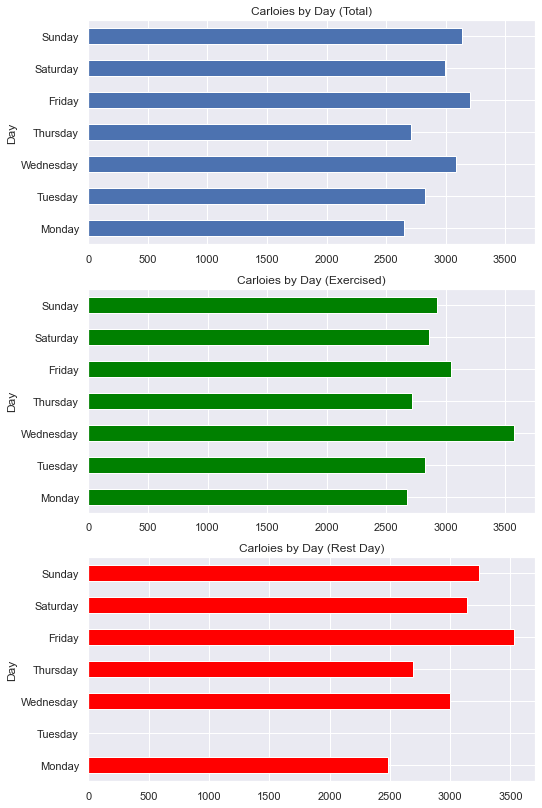

In [355]:
# Set to plot 3 axes on 3 row and 1 columns
fig, axes = plt.subplots(3, 1, figsize = [8, 14])
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)


# Plot the calories by day (total) chart
cal_avg.plot(
    ax = axes[0],
    kind = 'barh',
    title = 'Carloies by Day (Total)',
    xlim = [0, 3750],
    ylabel = 'Calories'
)

# Plot the calories by day (exercised) chart
ex_cal_avg.plot(
    ax = axes[1],
    kind = 'barh',
    title = 'Carloies by Day (Exercised)',
    color = 'green',
    ylabel = 'Calories'
)

# Plot the calories by day (rest day) chart
no_cal_avg.plot(
    ax = axes[2],
    kind = 'barh',
    title = 'Carloies by Day (Rest Day)',
    color = 'red',
    ylabel = 'Calories'
)

plt.savefig('q1.png')

**Answer & Observation:**<br>
Further interesting results between Exercised vs Rest Day calorie intakes can be seen in the above bar charts. It appears on Wednesdays after exercise, there is quite a large calorie consumption, while on rest days most calories are consumed on Fridays. Taking this into account, having a rest day on Wednesdays and exercising on Fridays could reduce calorie intake based on weekly average numbers.

**Q2.	From Nutrition Data, what affects the body weight the most?**

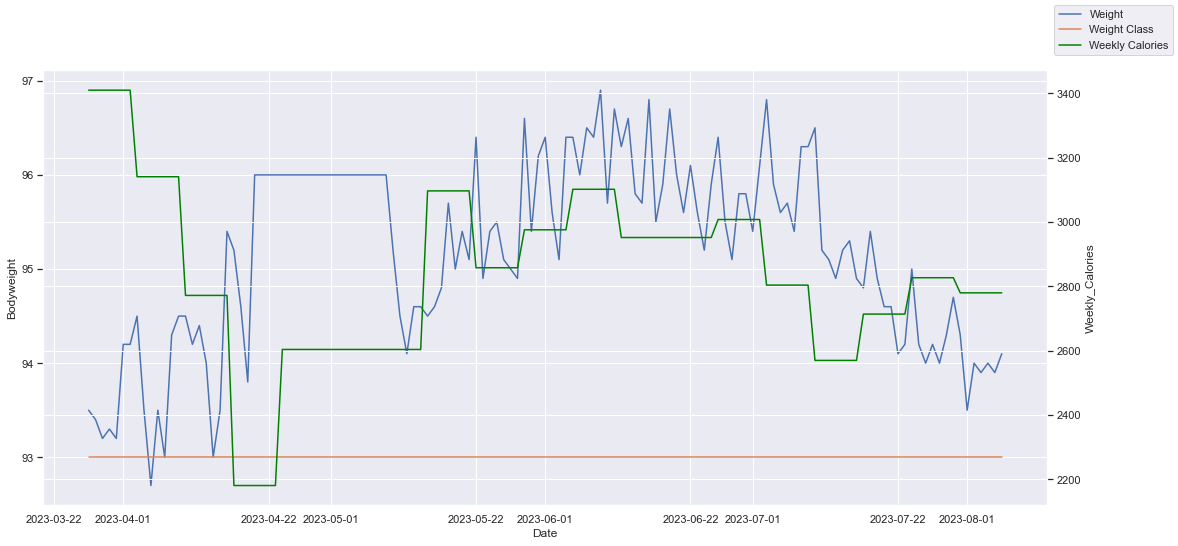

In [356]:
# Extract required data for charting
bodyweight = nutrition.groupby('Date').agg(Bodyweight=('Morning Bodyweight','max'))
weight_class = nutrition.groupby('Date').agg(Weight_Class=('Weight Class','max'))
weekly_calories = nutrition.groupby('Date').agg(Weekly_Calories=('Wk_Avg_Calories','max')).astype(int)
weekly_proteins = nutrition.groupby('Date').agg(Weekly_Proteins=('Wk_Avg_Proteins','max')).astype(int)
weekly_steps = nutrition.groupby('Date').agg(Weekly_Steps=('Wk_Avg_Steps','max')).astype(int)
weekly_sleep = nutrition.groupby('Date').agg(Weekly_Sleep=('Wk_Avg_Hours Slept','max'))

# Use seaborn's preset themes
ax1 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax1 = plt.subplots(1, 1, figsize = [18, 8])

# Plot bodyweight changes by date
sns.lineplot(
    x ='Date',
    y = 'Bodyweight',
    data = bodyweight,
    ax = ax1)

# Plot powerlifting weight class as a reference line
sns.lineplot(
    x ='Date',
    y = 'Weight_Class',
    data = weight_class,
    ax = ax1)

# Add secondary axis 
ax2 = ax1.twinx()

# Plot average weekly calorie consumption 
sns.lineplot(
    x ='Date',
    y = 'Weekly_Calories',
    data = weekly_calories,
    color = 'green',
    ax = ax2)

# Add legend to the chart
fig.legend(labels=['Weight','Weight Class','Weekly Calories'], loc = 'upper right')

# Output the chart
plt.savefig('q2_1.png')

**Answer & Observation:**<br>
It appears there is a relationship between weekly calorie intake vs bodyweight. As the calories reduce, bodyweight reduces in a similar trend.

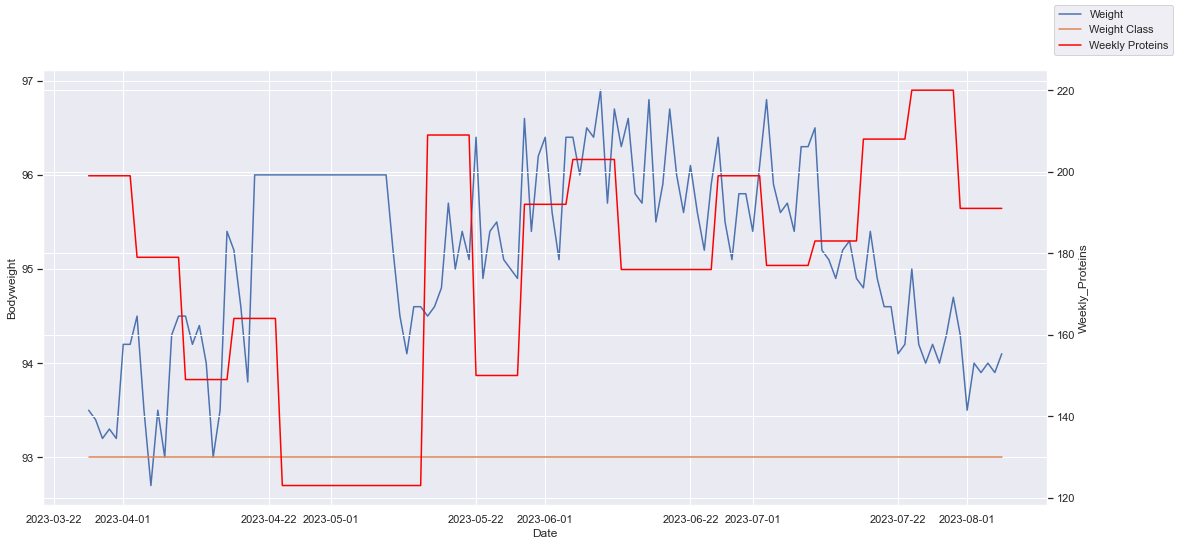

In [357]:
# Use seaborn's preset themes
ax3 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax3 = plt.subplots(1, 1, figsize = [18, 8])

# Plot bodyweight changes by date
sns.lineplot(
    x ='Date',
    y = 'Bodyweight',
    data = bodyweight,
    ax = ax3)

# Plot powerlifting weight class as a reference line
sns.lineplot(
    x ='Date',
    y = 'Weight_Class',
    data = weight_class,
    ax = ax3)

# Add secondary axis
ax4 = ax3.twinx()

# Plot average weekly protein consumption 
sns.lineplot(
    x ='Date',
    y = 'Weekly_Proteins',
    data = weekly_proteins,
    color = 'red',
    ax = ax4)

# Add legend to the chart
fig.legend(labels=['Weight','Weight Class','Weekly Proteins'], loc = 'upper right')

# Output the chart
plt.savefig('q2_2.png')

**Answer & Observation:**<br>
Above chart implies, as protein intake increases, bodyweight seem to decrease.

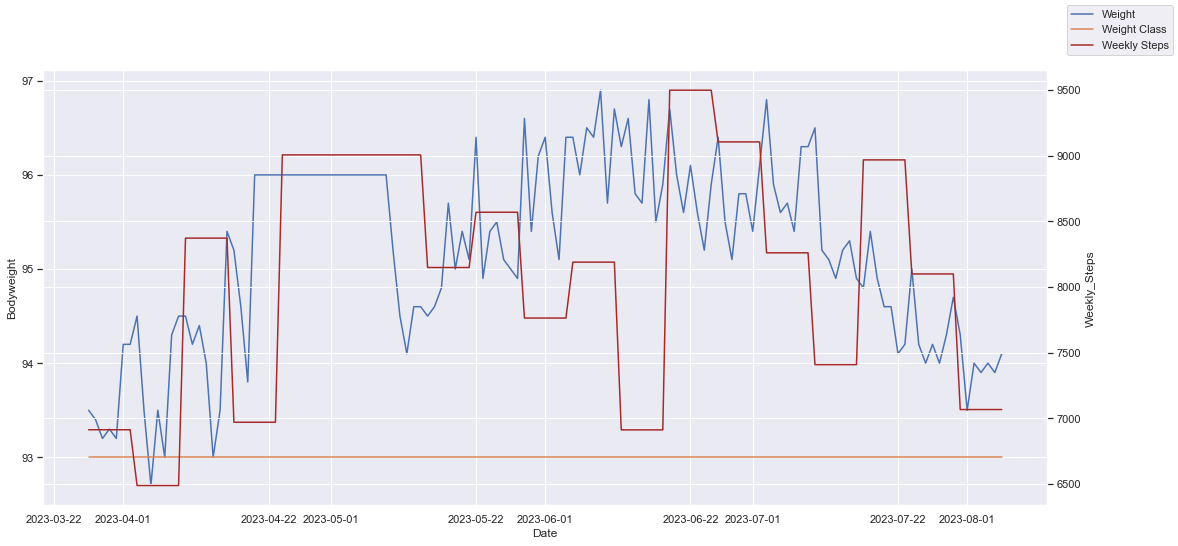

In [358]:
# Use seaborn's preset themes
ax5 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax5 = plt.subplots(1, 1, figsize = [18, 8])

# Plot bodyweight changes by date
sns.lineplot(
    x ='Date',
    y = 'Bodyweight',
    data = bodyweight,
    ax = ax5)

# Plot powerlifting weight class as a reference line
sns.lineplot(
    x ='Date',
    y = 'Weight_Class',
    data = weight_class,
    ax = ax5)

# Add secondary axis
ax6 = ax5.twinx()

# Plot average weekly number of steps 
sns.lineplot(
    x ='Date',
    y = 'Weekly_Steps',
    data = weekly_steps,
    color = 'brown',
    ax = ax6)

# Add legend to the chart
fig.legend(labels=['Weight','Weight Class','Weekly Steps'], loc = 'upper right')

# Output the chart
plt.savefig('q2_3.png')

**Answer & Observation:**<br>
From the above chart, the relationship between steps and body weight isn't obvious due to irregularity of step counts.

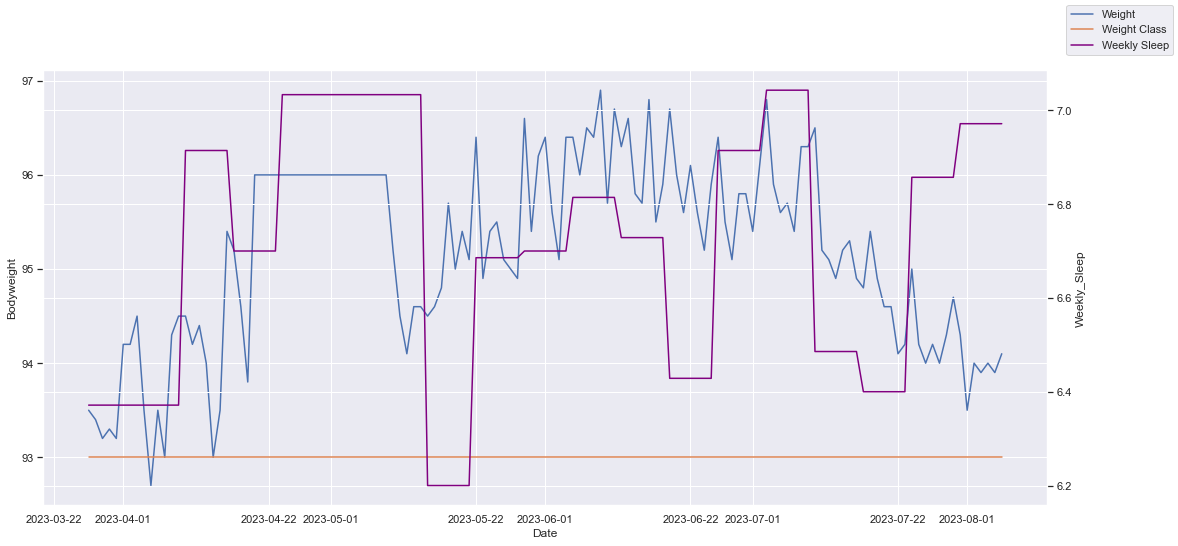

In [359]:
# Use seaborn's preset themes
ax7 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax7 = plt.subplots(1, 1, figsize = [18, 8])

# Plot bodyweight changes by date
sns.lineplot(
    x ='Date',
    y = 'Bodyweight',
    data = bodyweight,
    ax = ax7)

# Plot powerlifting weight class as a reference line
sns.lineplot(
    x ='Date',
    y = 'Weight_Class',
    data = weight_class,
    ax = ax7)

# Add secondary axis
ax8 = ax7.twinx()

# Plot average weekly hours of sleep
sns.lineplot(
    x ='Date',
    y = 'Weekly_Sleep',
    data = weekly_sleep,
    color = 'purple',
    ax = ax8)

# Add legend to the chart
fig.legend(labels=['Weight','Weight Class','Weekly Sleep'], loc = 'upper right')

# Output the chart
plt.savefig('q2_4.png')

**Answer & Observation:**<br>
Due to volatility of weekly sleep hours, it is also difficult to make a judgement if sleep is inducing weight loss.

**Q3.	What nutrition factors influence Morning Bodyweight?**

In [360]:
# Check dates that exist in df_pl to find Exercised dates
df_nut['Exercised'] = df_nut['Date'].isin(df_pl['Date'])

# Find correlation of all columns and sort by 'Morning Bodyweight'
df_nut.corr().sort_values(by='Morning Bodyweight', ascending = False)

,Calories,Proteins,Fats,Carbs,Morning Bodyweight,Steps,Hours Slept,Weight Class,resting_HR,Exercised
Morning Bodyweight,-0.170963,-0.116977,-0.088215,-0.117326,1.000000,0.168133,0.015095,NaN,0.124656,0.032093
Steps,-0.011651,-0.018140,0.050408,-0.241653,0.168133,1.000000,-0.040740,NaN,0.035762,-0.039592
resting_HR,0.210331,-0.343870,0.072544,0.362008,0.124656,0.035762,-0.080863,NaN,1.000000,-0.267902
Exercised,-0.228787,-0.041724,-0.344508,-0.023833,0.032093,-0.039592,-0.085728,NaN,-0.267902,1.000000
Hours Slept,-0.033834,0.092798,-0.052964,-0.143719,0.015095,-0.040740,1.000000,NaN,-0.080863,-0.085728
Fats,0.670330,0.142186,1.000000,0.137284,-0.088215,0.050408,-0.052964,NaN,0.072544,-0.344508
Proteins,0.356200,1.000000,0.142186,-0.063451,-0.116977,-0.018140,0.092798,NaN,-0.343870,-0.041724
Carbs,0.574797,-0.063451,0.137284,1.000000,-0.117326,-0.241653,-0.143719,NaN,0.362008,-0.023833
Calories,1.000000,0.356200,0.670330,0.574797,-0.170963,-0.011651,-0.033834,NaN,0.210331,-0.228787
Weight Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Answer & Observation:**<br>
Examining the correlation values of Morning Bodyweight, we can see calories have the greatest absolute correlation value. Potentially implying that as calories decrease, bodyweight decreases as well. Steps has second greatest absolute correlation value, where if steps are increased, bodyweight may decrease. 

Interestingly, third greatest absolute correlation is from resting_HR. Meaning, if resting heart rate were to increase, bodyweight may decrease. It is a known fact that increased heart rate can help lead fat loss (Marcin, 2023), however increases in resting heart rate can imply increases in stress levels as well (Whoop, 2021). This could lead to stress eating and potentially increasing calorie intake and nullifying fat loss effect (Harvard Health Publishing, 2021).

**Q4. How are calories correlated to macro nutrients (protein, carbs, and fats)?**

In [361]:
# Narrow down correlation table to calories and macro nutrients only
macro_corr = df_nut.corr()
macro_corr = macro_corr[['Calories','Proteins','Fats','Carbs']]
macro_corr = macro_corr.loc[['Calories','Proteins','Fats','Carbs']]

macro_corr

,Calories,Proteins,Fats,Carbs
Calories,1.000000,0.356200,0.670330,0.574797
Proteins,0.356200,1.000000,0.142186,-0.063451
Fats,0.670330,0.142186,1.000000,0.137284
Carbs,0.574797,-0.063451,0.137284,1.000000


**Answer & Observation:**<br>
Protein has the largest correlation value to calories. This could imply, increasing protein can decrease calorie consumption. There are many studies to support this where protein has shown to help lose weight by boosting metabolism, reducing appetite, and burning more calories to digest protein (Gunnars, 2023).

**Q5. How does sleep affect resting heart rate?**

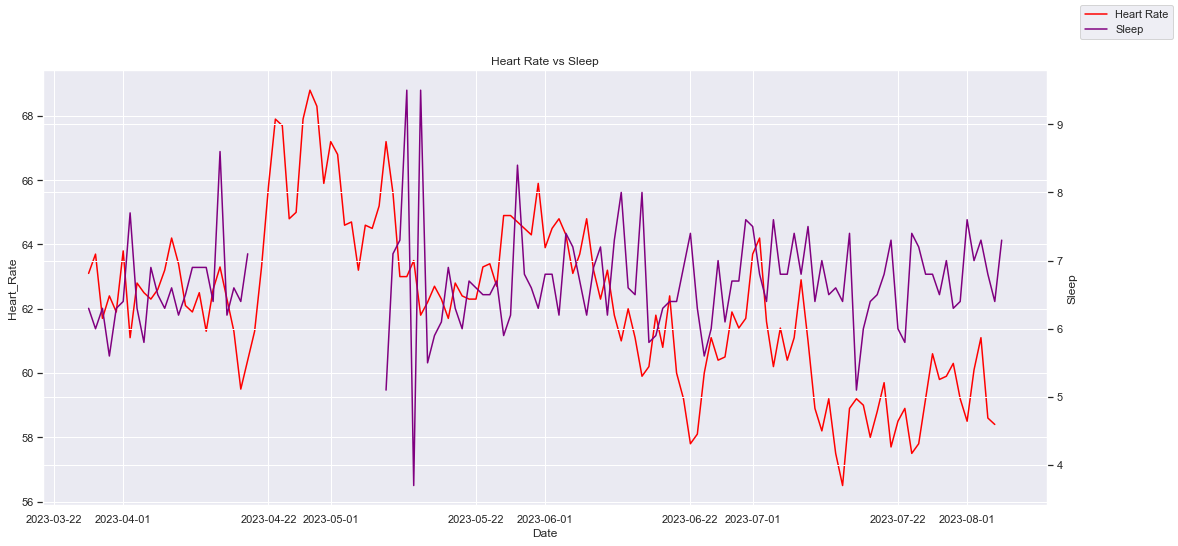

In [362]:
# Extract daily resting heart rate and hour of sleep for charting
heart_rate = df_nut.groupby('Date').agg(Heart_Rate=('resting_HR','max'))
sleep = df_nut.groupby('Date').agg(Sleep=('Hours Slept','max'))

# Use seaborn's preset themes
ax9 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax9 = plt.subplots(1, 1, figsize = [18, 8])

# Plot daily resting heart rate
sns.lineplot(
    x ='Date',
    y = 'Heart_Rate',
    data = heart_rate,
    color = 'red',
    ax = ax9).set(title='Heart Rate vs Sleep')

# Add secondary axis
ax10 = ax9.twinx()

# Plot daily hours of sleep
sns.lineplot(
    x ='Date',
    y = 'Sleep',
    data = sleep,
    color = 'purple',
    ax = ax10)

# Add legend to the chart
fig.legend(labels=['Heart Rate','Sleep'], loc = 'upper right')

# Output the chart
plt.savefig('q4_1.png')

**Answer & Observation:**<br>
No obvious relationship could be identified between resting heart rate and sleep. There are many studies that found regular exercises help falling asleep and improve quality of sleep (Johns Hopkins Medicine, n.d.), but this doesn’t appear to have a connection with resting heart rate. 

**Q6. What are the ranges of kilograms lifted in the gym on a week-to-week basis for compound movements (‘Low Bar Squat’, ‘Comp Bench’, ‘Conventional Deadlift’)?**

In [363]:
# Creating a list of exercises that we're interested in
sbd_exercises = ['Low Bar Squat', 'Comp Bench', 'Conventional Deadlift']

# From powerlifting training dataframe, filter down to the focus exercises
sbd_volume = df_pl[df_pl['Exercise'].isin(sbd_exercises)]

# Group and sum volume of weight lifted (in kgs) per week
sbd_volume = sbd_volume.groupby(['Block ID','Exercise']).agg(Volume=('Volume (kg)','sum')).reset_index()

# Rename column to more descriptive name
sbd_volume = sbd_volume.rename(columns = {'Block ID':'Block-Week'})

sbd_volume

,Block-Week,Exercise,Volume
0,1-1,Comp Bench,1560.0
1,1-1,Conventional Deadlift,3145.0
2,1-1,Low Bar Squat,2075.0
3,1-2,Comp Bench,1660.0
4,1-2,Conventional Deadlift,3260.0
5,1-2,Low Bar Squat,2150.0
6,1-3,Comp Bench,1710.0
7,1-3,Conventional Deadlift,3375.0
8,1-3,Low Bar Squat,2250.0
9,1-4,Comp Bench,1810.0


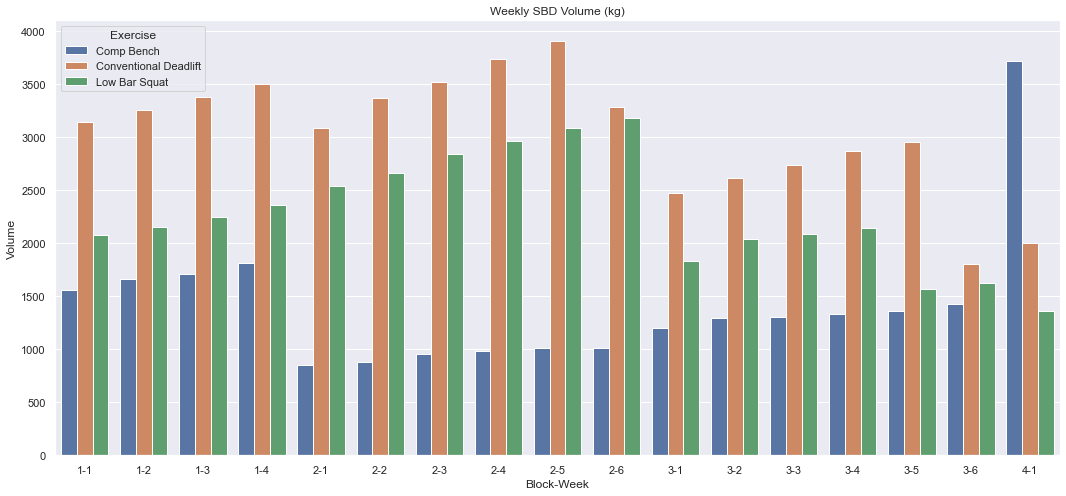

In [364]:
# Use seaborn's preset themes
ax11 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax11 = plt.subplots(1, 1, figsize = [18, 8])

# Plot bar chart of Block-Week volume by exercise
sns.barplot(
    y = 'Volume',
    x = 'Block-Week',
    data = sbd_volume,
    ax = ax11,
    hue = 'Exercise').set(title='Weekly SBD Volume (kg)')
    
# Output the chart
plt.savefig('q5_1.png')

**Answer & Observation:**<br>
There is a clear volume increases for all three lifts that can be seen week to week in the above bar chart. The gradual volume increase is thought to induce muscle adaptation while reducing the chance of injury compared to drastically increasing the volume suddenly (Team Juggernaut, 2014).

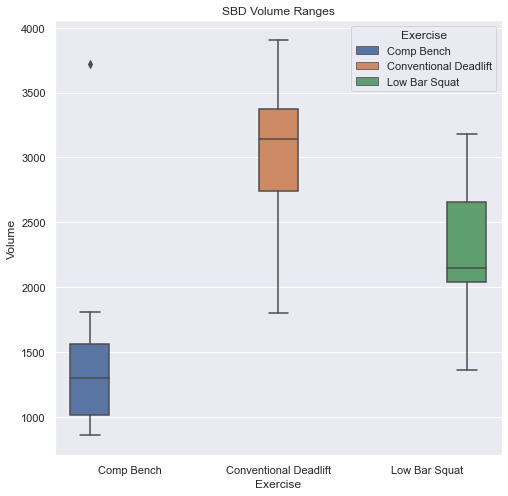

In [365]:
# Use seaborn's preset themes
ax12 = sns.set_style()

# Set to plot 1 axis on 1 row and 1 column
fig, ax12 = plt.subplots(1, 1, figsize = [8, 8])

# Plot box chart of volume by exercise
sns.boxplot(
    y = 'Volume',
    x = 'Exercise',
    data = sbd_volume,
    ax = ax12,
    hue = 'Exercise').set(title='SBD Volume Ranges')
    
# Output the chart
plt.savefig('q5_2.png')

**Answer & Observation:**<br>
Above box chart displays the ranges of volume (kg) lifted for the three compound movements. It is visible that I lift the most volume in Conventional Deadlifts, followed by Low Bar Squat and Comp Bench lagging behind the two movements.

**Q7. Within compound movements how does my max lifts compare to the public (comparing against StrengthLevel.com data)?**

In [366]:
# Define a function that checks if values in dataframe are floats
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [367]:
# From powerlifting training dataframe, filter down to the focus exercises
sbd_max = df_pl[df_pl['Exercise'].isin(sbd_exercises)]

# Filter if 'IsRPE' column is a float, if not assume the lift was unsuccessful and not counted towards max load
sbd_max = sbd_max[sbd_max['lsRPE'].apply(is_float)]

# Group by exercise and find the max load for each exercise
sbd_max = sbd_max.groupby(['Exercise','Reps']).agg(Max=('Load','max')).reset_index()

sbd_max

,Exercise,Reps,Max
0,Comp Bench,1,120.0
1,Comp Bench,2,115.0
2,Comp Bench,3,105.0
3,Comp Bench,4,102.5
4,Comp Bench,5,85.0
5,Comp Bench,7,77.5
6,Conventional Deadlift,1,230.0
7,Conventional Deadlift,2,220.0
8,Conventional Deadlift,3,190.0
9,Conventional Deadlift,4,205.0


In [368]:
# Create a Key to match StrengthLevel.com data
sbd_max['Key'] = sbd_max['Exercise'] + sbd_max['Reps'].astype(str) + sbd_max['Max'].astype(str)

# Merge StrengthLevel.com data to sbd_max dataframe
sbd_max = sbd_max.merge(sl_df, on=['Key'])

sbd_max.dtypes

Exercise                       object
Reps                            int64
Max                           float64
Key                            object
Stronger Than (Population)    float64
dtype: object

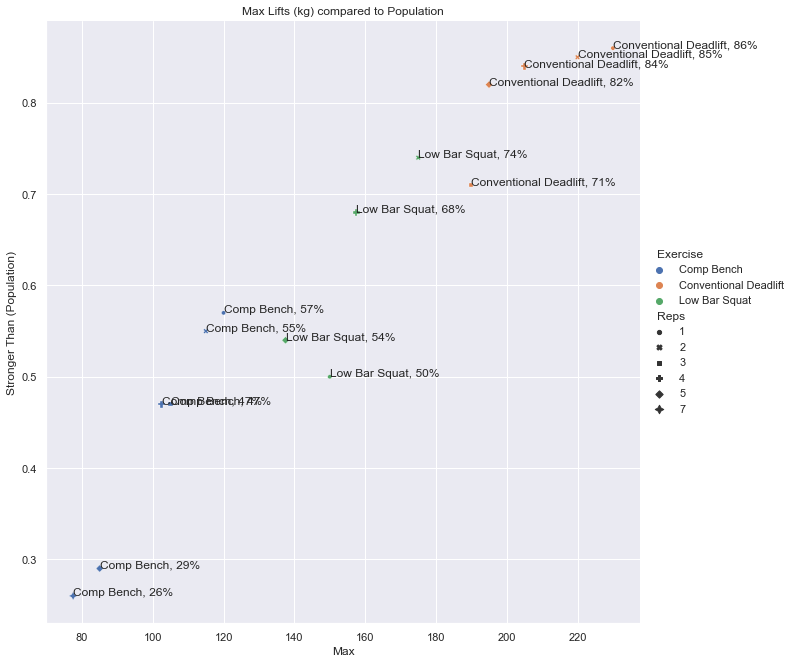

In [369]:
# Scatter plot to show Max weight lifted vs Strength percentile (stronger than x% of population)
sns.relplot(
    data = sbd_max,
    kind = 'scatter',
    x = 'Max',
    y = 'Stronger Than (Population)',
    hue = 'Exercise',
    size = 'Reps',
    style = 'Reps',
    height = 9,
    aspect = 1).set(title='Max Lifts (kg) compared to Population')

# Call out label of strength percentile + exercise
strength_percentile = (sbd_max['Exercise'] + ', ' 
                       + round(sbd_max['Stronger Than (Population)'] * 100,0).astype(str).apply(lambda x: x.replace('.0','%')))

# Function to add custom labels to scatter points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

# Execute the function
label_point(sbd_max['Max'], sbd_max['Stronger Than (Population)'], strength_percentile, plt.gca()) 

# Output the chart
plt.savefig('q6_1.png')

**Answer & Observation:**<br>
Above scatter plot conveys where my relative strength is compared to the public who logged their data on StrengthLevel.com. My strongest lift is the Conventional Deadlift that is stronger than 86% of the population followed by Low Bar Squat being 74%. My weakest lift is the Comp Bench, being only 57% stronger than the population. 

**Q8. Within the available data, what factors contribute to getting stronger (increasing my 'Max' load) in the 'Low Bar Squat'?**

In [370]:
# From powerlifting training dataframe, filter down to 'Low Bar Squat' only
squat_df = df_pl[df_pl['Exercise']=='Low Bar Squat']

# Select required columns
squat_df = squat_df[['Date','Exercise','Sets','Reps','Intensity','Load','lsRPE','Volume (kg)']]

# Group by date along with max load and sum of volume
squat_df = squat_df.groupby(['Date','Exercise']).agg(Max=('Load','max'), Volume=('Volume (kg)','sum')).reset_index()

# Combine nutrition data to the squat_df dataframe
combined_squat_df = df_nut.merge(squat_df, on=['Date'], how='left')

# Remove weekly average values that aren't required
combined_squat_df = combined_squat_df[['Exercise','Max','Volume','Calories','Proteins','Fats','Carbs',
                                       'Morning Bodyweight','Steps','Hours Slept','resting_HR',]]

combined_squat_df

,Exercise,Max,Volume,Calories,Proteins,Fats,Carbs,Morning Bodyweight,Steps,Hours Slept,resting_HR
0,Low Bar Squat,125.0,2075.0,2975.0,182.0,121.0,203.0,93.5,5435.0,6.3,63.1
1,NaN,NaN,NaN,2790.0,153.0,133.0,306.0,93.4,6163.0,6.0,63.7
2,NaN,NaN,NaN,4374.0,244.0,141.0,488.0,93.2,5466.0,6.3,61.7
3,NaN,NaN,NaN,2974.0,230.0,93.0,262.0,93.3,6414.0,5.6,62.4
4,NaN,NaN,NaN,4000.0,220.0,110.0,300.0,93.2,8511.0,6.3,61.9
...,...,...,...,...,...,...,...,...,...,...,...
128,NaN,NaN,NaN,2767.0,194.0,94.0,270.0,94.0,7058.0,7.0,60.1
129,NaN,NaN,NaN,2515.0,178.0,80.0,236.0,93.9,6084.0,7.3,61.1
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,9096.0,6.8,58.6
131,NaN,NaN,NaN,3267.0,171.0,119.0,324.0,93.9,8627.0,6.4,58.4


In [371]:
# Find correlation of all columns to find what factors are correlated to 'Max'
combined_squat_df.corr().sort_values(by='Max', ascending = False)

,Max,Volume,Calories,Proteins,Fats,Carbs,Morning Bodyweight,Steps,Hours Slept,resting_HR
Max,1.000000,-0.218792,-0.020622,0.359264,-0.092285,-0.007580,0.422345,0.180586,0.368718,-0.685024
Morning Bodyweight,0.422345,0.414350,-0.170963,-0.116977,-0.088215,-0.117326,1.000000,0.168133,0.015095,0.124656
Hours Slept,0.368718,0.224272,-0.033834,0.092798,-0.052964,-0.143719,0.015095,-0.040740,1.000000,-0.080863
Proteins,0.359264,-0.152962,0.356200,1.000000,0.142186,-0.063451,-0.116977,-0.018140,0.092798,-0.343870
Steps,0.180586,0.242684,-0.011651,-0.018140,0.050408,-0.241653,0.168133,1.000000,-0.040740,0.035762
Carbs,-0.007580,0.293414,0.574797,-0.063451,0.137284,1.000000,-0.117326,-0.241653,-0.143719,0.362008
Calories,-0.020622,0.036618,1.000000,0.356200,0.670330,0.574797,-0.170963,-0.011651,-0.033834,0.210331
Fats,-0.092285,-0.138808,0.670330,0.142186,1.000000,0.137284,-0.088215,0.050408,-0.052964,0.072544
Volume,-0.218792,1.000000,0.036618,-0.152962,-0.138808,0.293414,0.414350,0.242684,0.224272,0.542828
resting_HR,-0.685024,0.542828,0.210331,-0.343870,0.072544,0.362008,0.124656,0.035762,-0.080863,1.000000


**Answer & Observation:**<br>
Interestingly resting heart rate had the highest correlation value against the max weight. It is possible, when lifting maximum weight ranges, this could induce a stress response and increase the resting heart rate. Second highest correlation value is bodyweight, where it can be interpreted that as bodyweight decreases, max weight increases. This could also be due to reduction of bodyweight as I get fitter to lift heavier weights. 

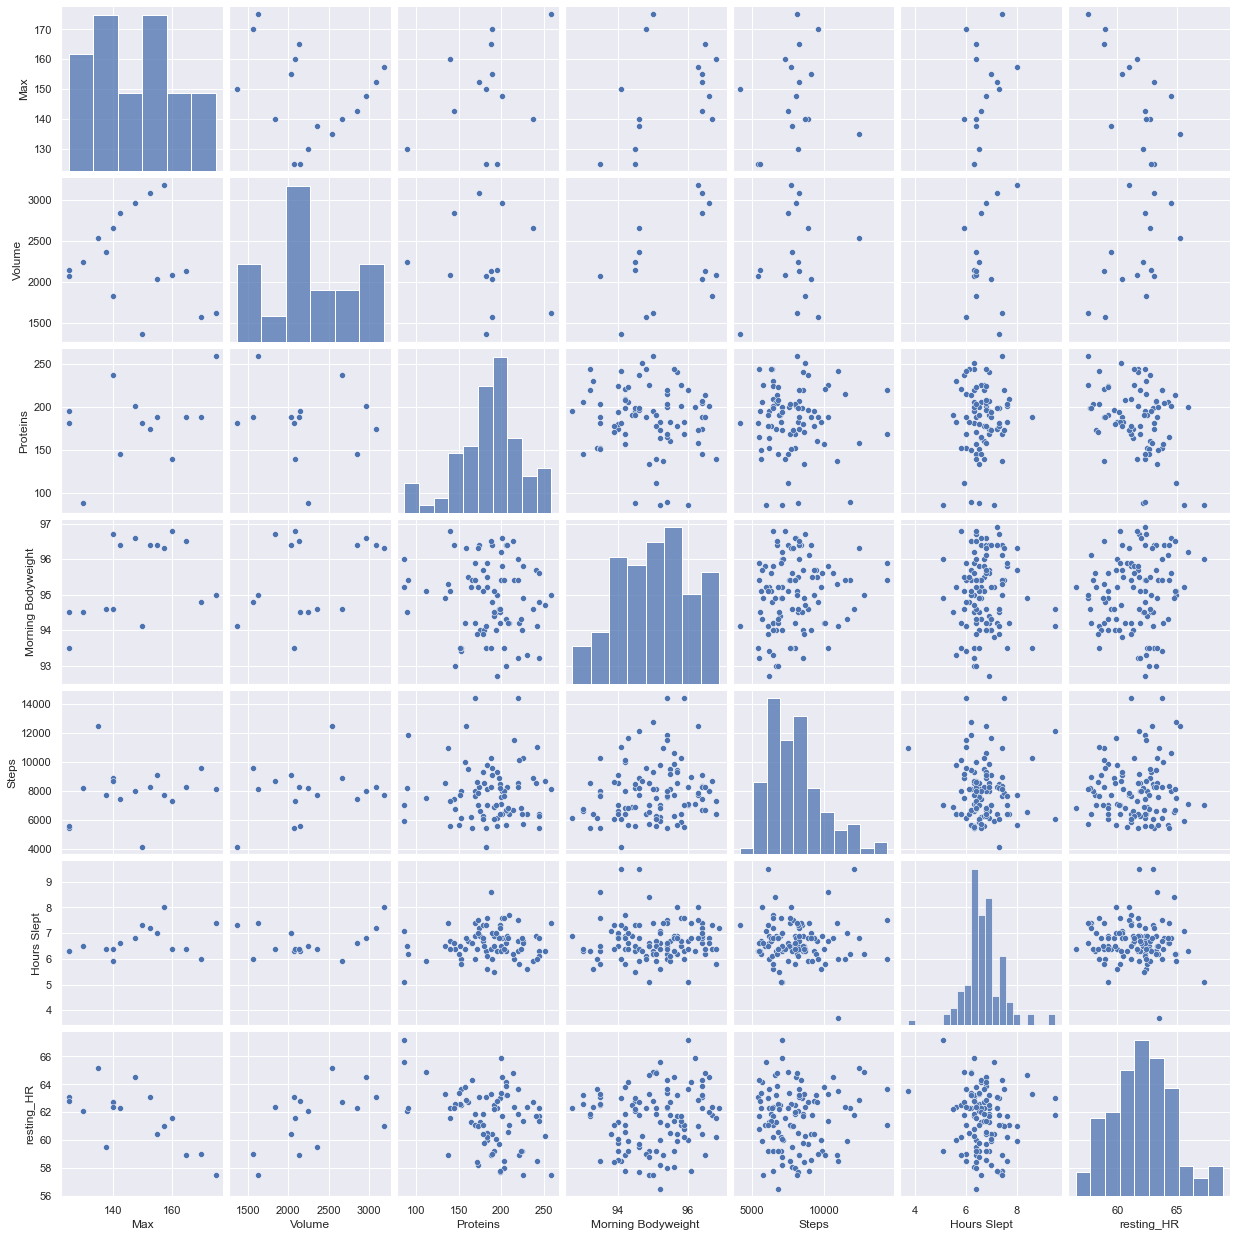

In [372]:
# Drop off columns that have no correlation (i.e. 'Calories','Fats' and 'Carbs')
combined_squat_df = combined_squat_df[['Exercise','Max','Volume','Proteins','Morning Bodyweight',
                                       'Steps','Hours Slept','resting_HR',]]

# Create a pairplot to visualise relationships between columns
sns.pairplot(combined_squat_df)

# Output the chart
plt.savefig('q7_1.png')

**Answer & Observation:**<br>
Lastly, no obvious relationships could be identified looking at charts related to Max. It is possible, many of these factors contribute to the Max squat strength but not in a stand-alone direct manner. There are also many potential factors that could affect max strength levels such as mindset (stress levels and motivation), how training has been going, injuries et cetera. All these factors must be taken in account in a wholistic view to assess optimal progression. 

## 6. Conclusion and Discussion

It is quite fascinating to see generally well-known relationships of bodyweight against calories and steps through my own data. There has been a lot of assumptions made as we can only correlate the data points and as we’re not able to measure a direct effect of each metric. Despite the assumptions, we can establish below conclusions:
- Calorie intake has a direct effect on bodyweight
- Increasing steps taken per day will lower bodyweight
- Consuming more protein (rather than carbs or fats) could lower calorie intake
- Training volume varies block to block, but always increases gradually week to week
- Deadlifts have the highest volume range, followed by squats, and then bench
- My deadlift is the strongest lift relative to public, followed by squats, and then bench
- Many factors contribute to lifting maximum load. With the dataset we have, it is not possible to single-out a factor that has a direct relationship

One conclusion we are able to make is that, as long as we keep training and doing what we can to improve, over time there will always be progress. 

## 7. Future Analysis
More data could add more insights and context to improving maximum strength for powerlifting. In the dataset we had, there was no way to quantify each training session, it would be interesting to score each training and analyse the scores against the other factors. Similarly, it would be interesting to see how stress and mental state could affect bodyweight and strength. Finally, being able to measure technical skills could provide a better picture of an individual’s powerlifting overall score. If this could be measured and scored, we may have better understanding to improve one’s maximal strength in the future. 

## 8. References<br>
Dumitru, P., 2020. Macronutrients and their importance in sports training of students practicing powerlifting, Chisinau: State University of Physical Education and Sport.
Gunnars, K., 2023. How Protein Can Help You Lose Weight Naturally. [Online] 
Available at: https://www.healthline.com/nutrition/how-protein-can-help-you-lose-weight#TOC_TITLE_HDR_3
[Accessed 12 August 2023].<br>
Harvard Health Publishing, 2021. Why stress causes people to overeat. [Online] 
Available at: https://www.health.harvard.edu/staying-healthy/why-stress-causes-people-to-overeat#:~:text=Stress%20eating%2C%20hormones%20and%20hunger&text=High%20cortisol%20levels%2C%20in%20combination,stress%20related%20responses%20and%20emotions.
[Accessed 12 August 2023].<br>
Johns Hopkins Medicine, n.d. Exercising for Better Sleep. [Online] 
Available at: https://www.hopkinsmedicine.org/health/wellness-and-prevention/exercising-for-better-sleep#:~:text=Recent%20research%20indicates%20that%20exercise,to%20medical%20treatments%20for%20insomnia.
[Accessed 12 August 2023].<br>
Latella C, T. W. S. J. v. d. H. D., 2020. Long-Term Strength Adaptation: A 15-Year Analysis of Powerlifting Athletes. J Strength Cond Res, 34(9), p. 2412–2418.<br>
Marcin, A., 2023. What’s a Fat-Burning Heart Rate, and How’s It Calculated?. [Online] 
Available at: https://www.healthline.com/health/fitness-exercise/fat-burning-heart-rate#_noHeaderPrefixedContent
[Accessed 12 August 2023].<br>
Team Juggernaut, 2014. Periodization for Powerlifting – The Definitive Guide. [Online] 
Available at: https://www.jtsstrength.com/periodization-powerlifting-definitive-guide/
[Accessed 12 August 2023].<br>
Whoop, 2021. Impact of Stress on HRV, Resting Heart Rate & Recovery. [Online] 
Available at: https://www.whoop.com/en-au/thelocker/stress-hrv-resting-heart-rate/#:~:text=Stress%20and%20Resting%20He
